<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_aic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（情報量基準AICによるモデル選択）

サイン関数の多項式回帰

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

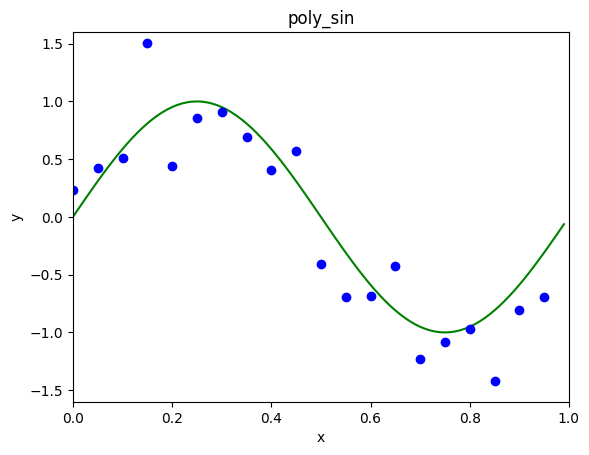

In [4]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo')
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

W
 [-0.09307826]


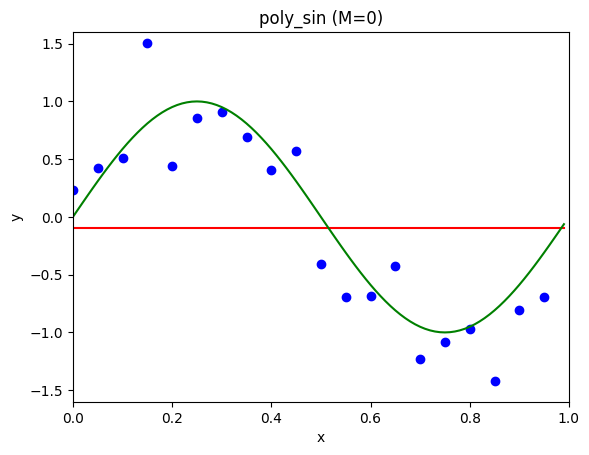

MSE= 0.6699288733743027
AIC= -6.011674627504753
W
 [ 1.01930284 -2.34185495]


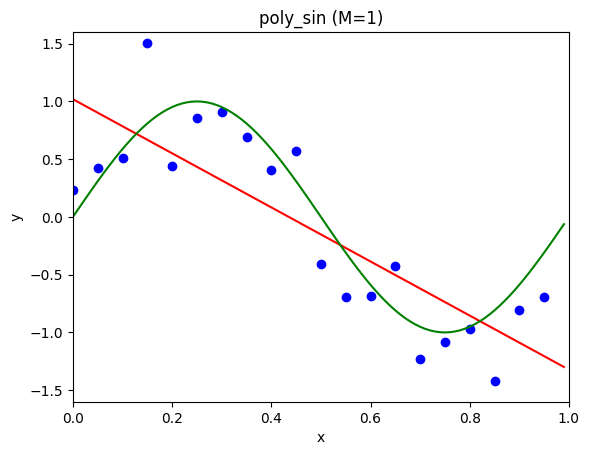

MSE= 0.214047713892223
AIC= -26.831126533989035
W
 [ 0.83321408 -1.1012632  -1.30588606]


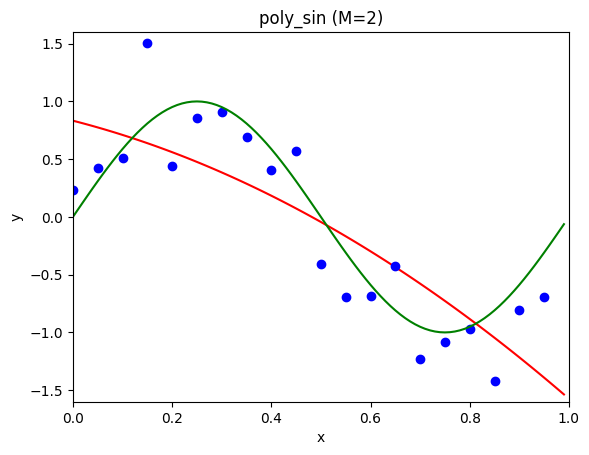

MSE= 0.20469180110762714
AIC= -25.72499680656882
W
 [  0.12478301   9.1876806  -29.0874965   19.49586697]


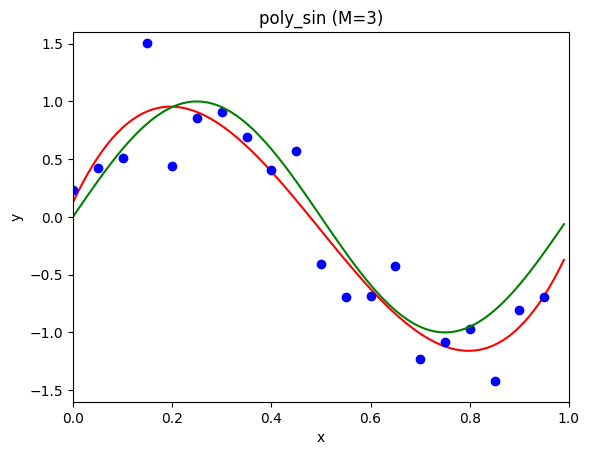

MSE= 0.07365540524008345
AIC= -44.16715495724852
W
 [  0.150679     8.47892602 -25.5275776   13.57194813   3.11785202]


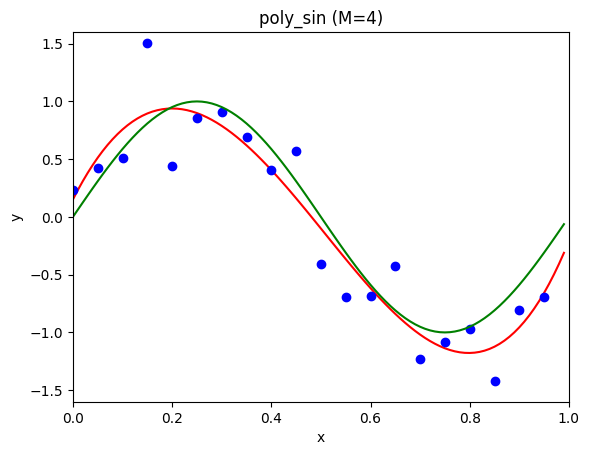

MSE= 0.07345113339751261
AIC= -42.22269891219585
W
 [  0.18611907   6.75612019 -11.54264586 -27.04942491  51.76109285
 -20.48136456]


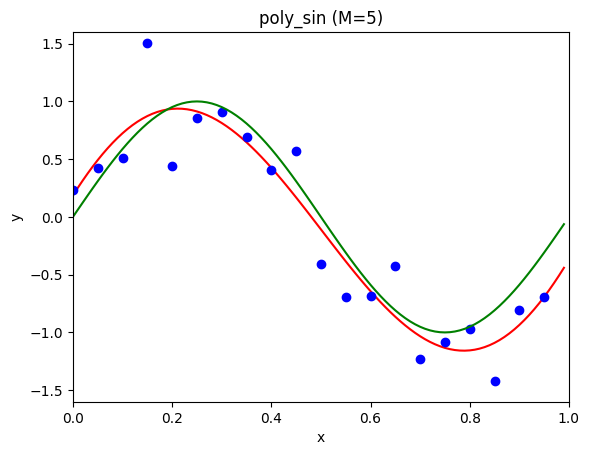

MSE= 0.07292942072801116
AIC= -40.36526289733389
W
 [ 2.12753520e-01  4.47991947e+00  1.59410889e+01 -1.48993412e+02
  2.97857152e+02 -2.50268749e+02  8.06271525e+01]


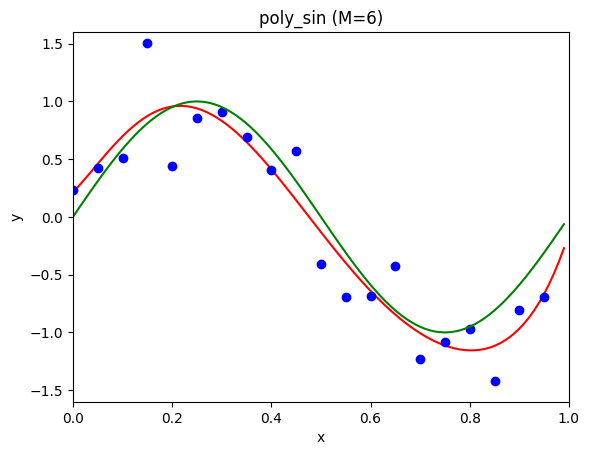

MSE= 0.07246637474546834
AIC= -38.492652426453084
W
 [ 1.95520135e-01  7.13980227e+00 -2.90847927e+01  1.32923325e+02
 -5.44663951e+02  1.04611821e+03 -9.10574150e+02  2.98105656e+02]


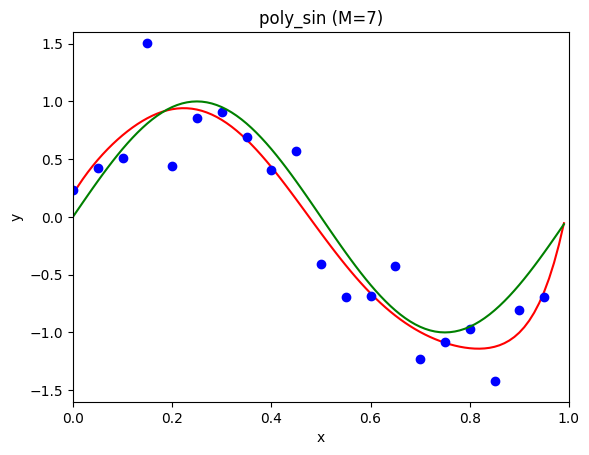

MSE= 0.07211743487972648
AIC= -36.5891889734207
W
 [ 1.98152857e-01  6.35996270e+00 -1.14728697e+01 -1.41952535e+01
  5.87312219e+01 -3.01561965e+02  7.61075355e+02 -7.83499720e+02
  2.84633003e+02]


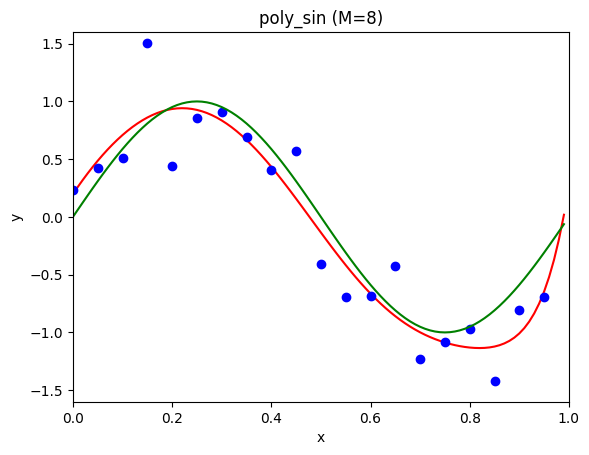

MSE= 0.07210066847935873
AIC= -34.59383926351681
W
 [ 2.42063580e-01 -2.10436061e+01  7.76679000e+02 -8.41238707e+03
  4.48911186e+04 -1.35292263e+05  2.40409031e+05 -2.49433746e+05
  1.39686521e+05 -3.26086443e+04]


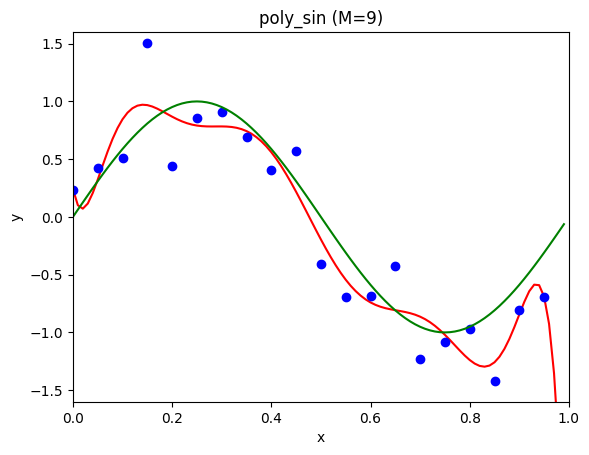

MSE= 0.06109767801322905
AIC= -35.90562833167059
AIC[9]=-35.905628


In [5]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]

AIC = np.zeros(len(search_range))

for M in search_range:

    W = E(x_train, y_train, M)
    print('W\n', W)

    y_estimate_aic = [y(x, W, M) for x in x_train]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train, y_train, 'bo')
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_train - y_estimate_aic)).mean()
    print('MSE=', mse)
    AIC[M] = N*np.log(mse) + 2*(M+1)
    print('AIC=', AIC[M])

print('AIC[%d]=%f'% (M, AIC[M]))



AIC
 [ -6.01167463 -26.83112653 -25.72499681 -44.16715496 -42.22269891
 -40.3652629  -38.49265243 -36.58918897 -34.59383926 -35.90562833]
The best order of the model is 3


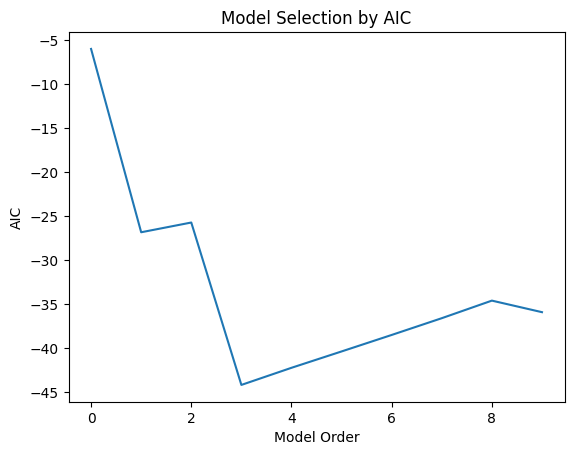

In [6]:
print('AIC\n', AIC)
print('The best order of the model is %d' % (np.argmin(AIC)))


plt.plot(AIC)
plt.title("Model Selection by AIC")
plt.xlabel('Model Order')
plt.ylabel('AIC')
plt.savefig('poly_sin_AIC.eps')
plt.show()
plt.close()
